In [4]:
import os, sys
import tensorflow as tf
from tensorflow import keras
from keras import (layers, utils)
import cv2
import matplotlib.pyplot as plt
from keras.layers import (Conv2D,
                   BatchNormalization,
                   Dense,
                   MaxPooling2D,
                   Flatten)
import numpy as np
np.set_printoptions(precision=2)

In [9]:
parent_dir = '/kaggle/input/eye-dataset'
branch_dir = os.path.join(parent_dir, 'Eye dataset')

train = utils.image_dataset_from_directory(branch_dir, shuffle=True, validation_split=.2, subset='training', seed=0, image_size=(100,100), batch_size=16)
valid = utils.image_dataset_from_directory(branch_dir, shuffle=True, validation_split=.2, subset='validation', seed=0, image_size=(100,100), batch_size=16)

Found 14360 files belonging to 4 classes.
Using 11488 files for training.
Found 14360 files belonging to 4 classes.
Using 2872 files for validation.


In [29]:
classes = train.class_names

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
EarlyStop = EarlyStopping(patience=10, restore_best_weights=True)
Reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', verbose=2, factor=0.5, min_lr=0.00001)
model_check = ModelCheckpoint('model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
callback = [EarlyStop, Reduce_LR, model_check]

In [11]:
model = keras.models.Sequential([Conv2D(32, 3, activation='selu', kernel_initializer='lecun_normal', input_shape=(100,100,3)),
                                 Conv2D(64, 3, activation='selu', kernel_initializer='lecun_normal'),
                                 BatchNormalization(),
                                 MaxPooling2D(3),
                                 Conv2D(128,3, activation='selu', kernel_initializer='lecun_normal'),
                                 BatchNormalization(),
                                 MaxPooling2D(3),
                                 Conv2D(256,3, activation='selu', kernel_initializer='lecun_normal'),
                                 BatchNormalization(),
                                 MaxPooling2D(3),
                                 Flatten(),
                                 Dense(64, kernel_initializer='lecun_normal', activation='selu'),
                                 Dense(4, kernel_initializer='glorot_normal', activation='softmax') ])

In [14]:
model.compile(loss='SparseCategoricalCrossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
history = model.fit(train, validation_data=valid, epochs=50, steps_per_epoch=50, validation_steps=50, callbacks = callback )

Epoch 1/50


I0000 00:00:1707897128.863333     271 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/50 [==========================>...] - ETA: 0s - loss: 1.1109 - accuracy: 0.6957
Epoch 1: val_loss improved from inf to 3.54727, saving model to model.hdf5
50/50 [==============================] - 7s 36ms/step - loss: 1.0750 - accuracy: 0.6975 - val_loss: 3.5473 - val_accuracy: 0.3688 - lr: 0.0010
Epoch 2/50
11/50 [=====>........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.7955

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


48/50 [===========================>..] - ETA: 0s - loss: 0.4699 - accuracy: 0.8359
Epoch 2: val_loss improved from 3.54727 to 1.00403, saving model to model.hdf5
50/50 [==============================] - 1s 22ms/step - loss: 0.4643 - accuracy: 0.8388 - val_loss: 1.0040 - val_accuracy: 0.6488 - lr: 0.0010
Epoch 3/50
47/50 [===========================>..] - ETA: 0s - loss: 0.5403 - accuracy: 0.8378
Epoch 3: val_loss improved from 1.00403 to 0.63251, saving model to model.hdf5
50/50 [==============================] - 1s 24ms/step - loss: 0.5395 - accuracy: 0.8375 - val_loss: 0.6325 - val_accuracy: 0.7788 - lr: 0.0010
Epoch 4/50
46/50 [==========================>...] - ETA: 0s - loss: 0.4452 - accuracy: 0.8546
Epoch 4: val_loss improved from 0.63251 to 0.39942, saving model to model.hdf5
50/50 [==============================] - 1s 21ms/step - loss: 0.4479 - accuracy: 0.8562 - val_loss: 0.3994 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 5/50
46/50 [==========================>...] - ETA: 0s - l

In [24]:
img = cv2.imread('/kaggle/input/adadada/images (1).jpg') #validating with image from internet
img = cv2.resize(img, (100,100))
te = tf.expand_dims(img, axis=0)

Text(0.5, 1.0, 'left_look')

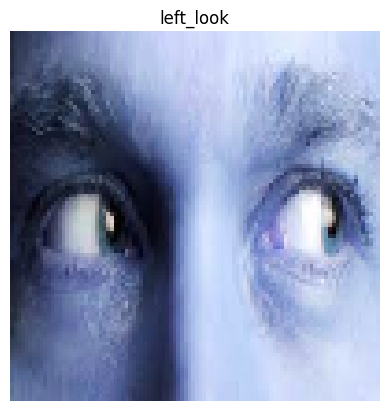

In [30]:
plt.imshow(img)
plt.axis('off')
plt.title(classes[np.argmax(model(te))])